# 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/deep_learning_project/df_with_type.pkl')

In [ ]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
0,0,0,112641719,3,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.026633,56320860.00,139.30003,56320958.0,56320761.0,112641719.0,56320860.00,139.30003,56320958.0,56320761.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56320860.0,139.30003,56320958.0,56320761.0,Benign,0
1,0,0,112641466,3,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.026633,56320732.00,114.55130,56320814.0,56320652.0,112641466.0,56320732.00,114.55130,56320814.0,56320652.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0.026633,0.000000,0,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56320732.0,114.55130,56320814.0,56320652.0,Benign,0
2,0,0,112638623,3,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.026634,56319310.00,301.93460,56319525.0,56319098.0,112638623.0,56319310.00,301.93460,56319525.0,56319098.0,0.0,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0.026634,0.000000,0,0,0.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0.0,0.0,0.0,0.0,56319310.0,301.93460,56319525.0,56319098.0,Benign,0
3,22,6,6453966,15,10,1239,2273.0,744,0,82.6,196.8,976,0,227.2,371.8,544.161528,3.873587,268915.25,247443.78000,673900.0,22.0,6453966.0,460997.56,123109.42000,673900.0,229740.0,5637902.0,626433.56,455082.22,1167293.0,554.0,0,0,0,0,488,328,2.324152,1.549435,0,976,135.1,277.8,77192.16,0,0,0,1,0,0,0,0,0,140.5,82.6,227.2,0,0,0,0,0,0,15,1239,10,2273,65535,233,6,32,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0
4,22,6,8804066,14,11,1143,2209.0,744,0,81.6,203.8,976,0,200.9,362.2,380.733175,2.839597,366836.10,511356.62000,1928102.0,21.0,8804066.0,677235.90,532417.00000,1928102.0,246924.0,7715481.0,771548.10,755543.06,2174893.0,90.0,0,0,0,0,456,360,1.590174,1.249423,0,976,128.9,279.8,78267.35,0,0,0,1,0,0,0,0,0,134.1,81.6,200.9,0,0,0,0,0,0,14,1143,11,2209,5808,233,6,32,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,Benign,0


# DBSCAN
- 밀도 기반 군집화 
- 점을 중심으로 epsilon반경 내에 min_samples개수 만큼 들어 있으면 이 데이터 포인트를 핵심 포인트(core_point)로 분류 
- core point가 서로 다른 core point의 군집의 일부가 되면 그 군집을 서로 연결되어 있다 하고 하나의 군집으로 연결
- 군집에는 속하지만, 스스로 core point 가 안되는 점을 border point, 주로 클러스터의 외곽을 이루는 점
- 어느 클러스터에도 속하지 않은 점은 noise point

In [ ]:
DF = df.sample(n=10000,random_state=13)

In [ ]:
df_label = DF['Label']
df_type = DF['Type']
features = DF.drop(['Label','Type','Dst Port','Protocol'],axis=1)

In [ ]:
DF

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
2583840,62946,6,1150,5,2,935,299.0,935,0,187.00000,418.25000,299,0,149.50,211.375,1.073044e+06,6086.956543,1.916667e+02,2.374301e+02,611.0,6.0,1150.0,287.5,4.237338e+02,908.0,6.0,611.0,611.0,0.00,611.0,611.0,0,0,0,0,124,40,4347.826172,1739.130493,0,935,154.25000,332.25000,110468.789062,0,0,1,1,0,0,0,1,0,176.2500,187.00000,149.50,0,0,0,0,0,0,5,935,2,299,65535,32768,1,20,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,0
1600921,53,17,24891,1,1,45,163.0,45,45,45.00000,0.00000,163,163,163.00,0.000,8.356434e+03,80.350327,2.489100e+04,0.000000e+00,24891.0,24891.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,8,8,40.175163,40.175163,45,163,84.31250,68.12500,4641.333496,0,0,0,0,0,0,0,0,1,126.5000,45.00000,163.00,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,0
4474000,80,6,117676835,18,16,879,1412.0,434,0,48.84375,140.12500,706,0,88.25,241.125,1.946857e+01,0.288927,3.565965e+06,4.678841e+06,10014448.0,39.0,117676832.0,6922167.0,4.510236e+06,10109100.0,95758.0,113404496.0,7560300.0,4390665.00,10109388.0,97000.0,0,0,0,0,372,464,0.152961,0.135966,0,706,65.43750,189.75000,35989.195312,0,0,0,1,0,0,0,0,0,67.3750,48.84375,88.25,0,0,0,0,0,0,18,879,16,1412,8192,176,13,20,309336.0,711886.3125,2455754.0,94618.0,10000256.0,4.682262e+04,10014448.0,9859081.0,Benign,0
7344021,52060,6,118561801,10,0,522,0.0,58,0,52.18750,18.34375,0,0,0.00,0.000,4.402767e+00,0.084344,1.317353e+07,1.981385e+07,59388896.0,236022.0,118561800.0,13173533.0,1.981385e+07,59388896.0,236022.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,200,0,0.084344,0.000000,0,58,47.46875,23.46875,550.472717,0,0,0,0,1,1,0,0,0,52.1875,52.18750,0.00,0,0,0,0,0,0,10,522,0,0,62,-1,9,20,7207646.0,0.0000,7207646.0,7207646.0,27838538.0,2.298038e+07,59388896.0,7423617.0,Benign,0
2983736,80,6,1117,2,0,0,0.0,0,0,0.00000,0.00000,0,0,0.00,0.000,0.000000e+00,1790.510254,1.117000e+03,0.000000e+00,1117.0,1117.0,1117.0,1117.0,0.000000e+00,1117.0,1117.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,40,0,1790.510254,0.000000,0,0,0.00000,0.00000,0.000000,0,0,0,0,1,0,0,0,0,0.0000,0.00000,0.00,0,0,0,0,0,0,2,0,0,0,32738,-1,0,20,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDOS attack-HOIC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192245,14304,6,86079245,2,0,0,0.0,0,0,0.00000,0.00000,0,0,0.00,0.000,0.000000e+00,0.023234,8.607925e+07,0.000000e+00,86079248.0,86079248.0,86079248.0,86079248.0,0.000000e+00,86079248.0,86079248.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,40,0,0.023234,0.000000,0,0,0.00000,0.00000,0.000000,0,0,0,0,1,0,0,0,0,0.0000,0.00000,0.00,0,0,0,0,0,0,2,0,0,0,62549,-1,0,20,0.0,0.0000,0.0,0.0,86079248.0,0.000000e+00,86079248.0,86079248.0,Benign,0
1201813,53,

### PCA
- n_componenets = 2

In [ ]:
from dask_ml.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(features)
x = ss.transform(features)

In [ ]:
protocol = pd.get_dummies(DF['Protocol'])
protocol.head()

,0,6,17
2583840,0,1,0
1600921,0,0,1
4474000,0,1,0
7344021,0,1,0
2983736,0,1,0


In [ ]:
ss_feat = pd.DataFrame(x)
feature = pd.concat([protocol,ss_feat],axis=1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
comp = pca.fit_transform(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pca_df = pd.DataFrame(data=comp, columns = ['pca components1','pca components2'])
pca_df

,pca components1,pca components2
0,4.186837,-2.432061
1,-1.647231,-1.047055
2,3.908128,3.526579
3,2.614413,8.972358
4,-2.840846,-0.161752
...,...,...
9995,-1.218277,14.404191
9996,-2.106059,-0.827904
9997,4.172740,-0.441229
9998,-1.914642,-0.908583


### DBSCAN
- min_samples = 200 -> 군집개수 : 10 개 
- pca 를 2개로 축소한 녀석과 실루엣 계수 구함
- 전체 피처와 실루엣 계수 구함

In [ ]:
# 12개의 비정상 종류
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1만개의 랜덤샘플 
DF

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Type
2583840,62946,6,1150,5,2,935,299.0,935,0,187.00000,418.25000,299,0,149.50,211.375,1.073044e+06,6086.956543,1.916667e+02,2.374301e+02,611.0,6.0,1150.0,287.5,4.237338e+02,908.0,6.0,611.0,611.0,0.00,611.0,611.0,0,0,0,0,124,40,4347.826172,1739.130493,0,935,154.25000,332.25000,110468.789062,0,0,1,1,0,0,0,1,0,176.2500,187.00000,149.50,0,0,0,0,0,0,5,935,2,299,65535,32768,1,20,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,0
1600921,53,17,24891,1,1,45,163.0,45,45,45.00000,0.00000,163,163,163.00,0.000,8.356434e+03,80.350327,2.489100e+04,0.000000e+00,24891.0,24891.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,8,8,40.175163,40.175163,45,163,84.31250,68.12500,4641.333496,0,0,0,0,0,0,0,0,1,126.5000,45.00000,163.00,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,0
4474000,80,6,117676835,18,16,879,1412.0,434,0,48.84375,140.12500,706,0,88.25,241.125,1.946857e+01,0.288927,3.565965e+06,4.678841e+06,10014448.0,39.0,117676832.0,6922167.0,4.510236e+06,10109100.0,95758.0,113404496.0,7560300.0,4390665.00,10109388.0,97000.0,0,0,0,0,372,464,0.152961,0.135966,0,706,65.43750,189.75000,35989.195312,0,0,0,1,0,0,0,0,0,67.3750,48.84375,88.25,0,0,0,0,0,0,18,879,16,1412,8192,176,13,20,309336.0,711886.3125,2455754.0,94618.0,10000256.0,4.682262e+04,10014448.0,9859081.0,Benign,0
7344021,52060,6,118561801,10,0,522,0.0,58,0,52.18750,18.34375,0,0,0.00,0.000,4.402767e+00,0.084344,1.317353e+07,1.981385e+07,59388896.0,236022.0,118561800.0,13173533.0,1.981385e+07,59388896.0,236022.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,200,0,0.084344,0.000000,0,58,47.46875,23.46875,550.472717,0,0,0,0,1,1,0,0,0,52.1875,52.18750,0.00,0,0,0,0,0,0,10,522,0,0,62,-1,9,20,7207646.0,0.0000,7207646.0,7207646.0,27838538.0,2.298038e+07,59388896.0,7423617.0,Benign,0
2983736,80,6,1117,2,0,0,0.0,0,0,0.00000,0.00000,0,0,0.00,0.000,0.000000e+00,1790.510254,1.117000e+03,0.000000e+00,1117.0,1117.0,1117.0,1117.0,0.000000e+00,1117.0,1117.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,40,0,1790.510254,0.000000,0,0,0.00000,0.00000,0.000000,0,0,0,0,1,0,0,0,0,0.0000,0.00000,0.00,0,0,0,0,0,0,2,0,0,0,32738,-1,0,20,0.0,0.0000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,DDOS attack-HOIC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192245,14304,6,86079245,2,0,0,0.0,0,0,0.00000,0.00000,0,0,0.00,0.000,0.000000e+00,0.023234,8.607925e+07,0.000000e+00,86079248.0,86079248.0,86079248.0,86079248.0,0.000000e+00,86079248.0,86079248.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,40,0,0.023234,0.000000,0,0,0.00000,0.00000,0.000000,0,0,0,0,1,0,0,0,0,0.0000,0.00000,0.00,0,0,0,0,0,0,2,0,0,0,62549,-1,0,20,0.0,0.0000,0.0,0.0,86079248.0,0.000000e+00,86079248.0,86079248.0,Benign,0
1201813,53,

In [ ]:
df_label = DF['Label']
df_type = DF['Type']
features = DF.drop(['Label','Type','Dst Port','Protocol'],axis=1)

In [ ]:
df_label.value_counts()

Benign                      7362
DDOS attack-HOIC             833
DoS attacks-Hulk             556
Bot                          345
SSH-Bruteforce               250
FTP-BruteForce               212
Infilteration                199
DoS attacks-SlowHTTPTest     173
DoS attacks-GoldenEye         55
DoS attacks-Slowloris         13
Brute Force -Web               1
SQL Injection                  1
Name: Label, dtype: int64

In [ ]:
feature = pd.concat([protocol,ss_feat],axis=1)
feature

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2583840,0,1,0,-0.373640,-0.012704,-0.015162,0.564401,-0.013751,2.116072,-0.358330,1.927179,2.442537,-0.028434,-0.442343,0.303466,0.473542,0.247203,-0.210843,-0.247752,-0.245795,-0.339711,-0.222770,-0.365214,-0.262893,-0.251665,-0.330883,-0.226471,-0.257545,-0.166535,-0.218472,-0.222132,-0.057144,-0.18123,0.0,-0.017323,0.0,0.002085,-0.015857,-0.182420,-0.196998,-0.397941,1.111875,0.764495,1.326716,0.946392,-0.049049,-0.18123,2.211172,1.241229,-0.796065,-0.220086,-0.017323,2.211172,-0.802130,0.828879,1.927179,0.303466,0.0,0.0,0.0,0.0,0.0,0.0,-0.012704,0.564401,-0.015162,-0.013749,2.707804,1.282380,-0.200479,0.013464,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
1600921,0,0,1,-0.372814,-0.096480,-0.016609,-0.357101,-0.013886,-0.558539,1.404988,-0.148720,-0.641594,-0.320917,3.006948,0.389231,-0.639217,-0.076046,-0.230846,-0.246151,-0.245862,-0.338367,-0.221155,-0.365254,-0.262911,-0.251778,-0.330934,-0.226471,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,-0.112862,-0.018172,-0.202761,-0.210560,1.611028,-0.437053,0.093630,-0.325096,-0.474711,-0.049049,-0.18123,-0.452249,-0.805653,-0.796065,-0.220086,-0.017323,-0.452249,0.965455,0.374962,-0.148720,0.389231,0.0,0.0,0.0,0.0,0.0,0.0,-0.096480,-0.357101,-0.016609,-0.013884,-0.622017,-0.412015,-0.472758,-1.403794,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
4474000,0,1,0,3.721849,0.259564,0.005094,0.506419,-0.012647,0.610476,-0.358330,-0.092528,0.391672,0.846867,-0.442343,-0.085651,0.630157,-0.078577,-0.231113,-0.016717,1.074614,0.214934,-0.222768,3.744433,0.179067,0.954886,0.232372,-0.220350,4.794275,1.808868,1.171569,0.914110,-0.026838,-0.18123,0.0,-0.017323,0.0,0.247836,0.014815,-0.202950,-0.210880,-0.397941,0.652413,-0.087426,0.435535,-0.053756,-0.049049,-0.18123,-0.452249,1.241229,-0.796065,-0.220086,-0.017323,-0.452249,-0.802130,-0.164491,-0.092528,-0.085651,0.0,0.0,0.0,0.0,0.0,0.0,0.259564,0.506419,0.005094,-0.012646,-0.205738,-0.402863,3.066868,0.013464,0.284903,0.961152,1.674557,0.096239,0.345935,-0.049533,0.335306,0.346611
7344021,0,1,0,3.752649,0.092014,-0.018056,0.136783,-0.014047,-0.519472,-0.358330,-0.043646,-0.506330,-0.671468,-0.442343,-0.646299,-0.639217,-0.078582,-0.231114,0.605781,5.346064,2.949679,-0.207452,3.775340,0.578215,5.049201,2.978374,-0.211384,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,0.077396,-0.018751,-0.202950,-0.210881,-0.397941,-0.647723,-0.259788,-0.604372,-0.529645,-0.049049,-0.18123,-0.452249,-0.805653,1.256178,4.543679,-0.017323,-0.452249,-0.802130,-0.303061,-0.043646,-0.646299,0.0,0.0,0.0,0.0,0.0,0.0,0.092014,0.136783,-0.018056,-0.014046,-0.618816,-0.412015,1.977752,0.013464,8.405626,-0.049422,5.072204,14.013280,1.441671,15.422401,3.326943,0.196070
2983736,0,1,0,-0.373641,-0.075536,-0.018056,-0.403694,-0.014047,-0.693772,-0.358330,-0.806575,-0.641594,-0.671468,-0.442343,-0.6462

In [ ]:
models = DBSCAN(min_samples=200)
pred = models.fit_predict(feature)
p = pd.DataFrame(pred,columns=['pred'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
p.value_counts()

pred
-1      4863
 3      1570
 2       858
 1       633
 4       553
 0       438
 5       393
 8       237
 7       232
 6       223
dtype: int64

In [ ]:
# 형성된 군집의 갯수 
rr = np.unique(pred)
rr

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
# PCA n_components = 2로 차원축소한 데이터프레임과 DBSCAN으로 예측한 데이터프레임 합치기 
r = pd.concat([pca_df,p],axis=1).reset_index().drop('index',axis=1)

In [ ]:
r

,pca components1,pca components2,pred
0,4.186836,-2.432062,0
1,-1.647231,-1.047055,-1
2,3.908128,3.526583,-1
3,2.614412,8.972354,-1
4,-2.840846,-0.161752,1
...,...,...,...
9995,-1.218277,14.404191,6
9996,-2.106059,-0.827904,3
9997,4.172739,-0.441231,-1
9998,-1.914642,-0.908583,3


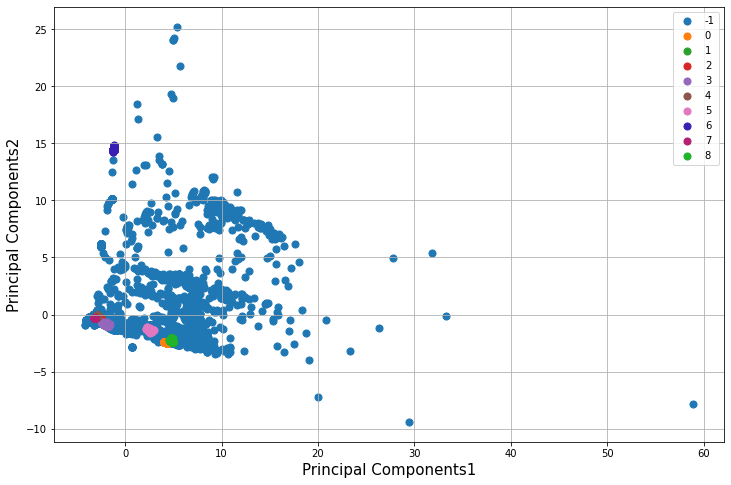

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Components1',fontsize=15)
ax.set_ylabel('Principal Components2',fontsize=15)

colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2",'#3a1fb4','#b41f71','#1fb429']
for target,color in zip(rr,colors):
  idx = r['pred']==target
  ax.scatter(r.loc[idx,'pca components1'],r.loc[idx,'pca components2'],c=color,s=50)
ax.legend(rr)
ax.grid()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(pca_df,r['pred'])

0.0230086727651557

In [ ]:
# 차원축소 안하고 feature와 DBSCAN군집 간 실루엣 계수 
silhouette_score(feature,r['pred'])

0.23178516347915373

# DBSCAN 
- min_samples = 100으로 시도 

In [ ]:
models = DBSCAN(min_samples=100)
pred = models.fit_predict(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
np.unique(pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19])

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(pca_df,pred)

0.2327488133403011

In [ ]:
# 차원축소 안하고 feature와 DBSCAN군집 간 실루엣 계수 
silhouette_score(feature,pred)

0.4664626122662611

### DBSCAN 
- min_samples = 700 -> 두개의 군집으로 분리됨
- pca 2개로 축소된 것과 실루엣 계수
- 전체 컬럼과의 실루엣 계수

In [ ]:
models = DBSCAN(min_samples=700)
pred = models.fit_predict(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(pca_df,pred)

-0.26958687832995876

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(feature,pred)

-0.17646745363222613

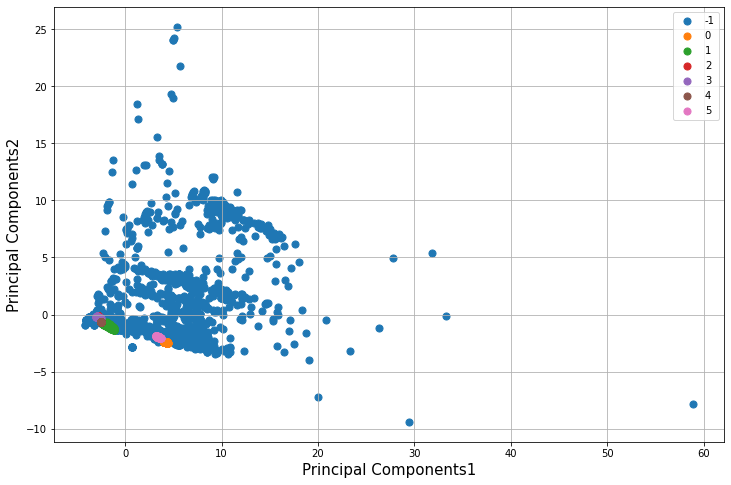

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Components1',fontsize=15)
ax.set_ylabel('Principal Components2',fontsize=15)

colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd","#8c564b","#e377c2"]
for target,color in zip(rr,colors):
  idx = r['pred']==target
  ax.scatter(r.loc[idx,'pca components1'],r.loc[idx,'pca components2'],c=color,s=50)
ax.legend(rr)
ax.grid()

# PCA 
- n_components = 10 으로 변경
- DBSCAN min_sample다양하게 조정해보며 실루엣 계수 구함
  - min_sample : 200 
  - min_sample : 100 
  - min_sample : 50시도 

In [ ]:
feature = pd.concat([protocol,ss_feat],axis=1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
comp = pca.fit_transform(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pca_df = pd.DataFrame(data=comp, columns = ['pca components1','pca components2','pca components3',
                                            'pca components4','pca components5','pca components6',
                                            'pca components7','pca components8','pca components9','pca components10'])
pca_df

,pca components1,pca components2,pca components3,pca components4,pca components5,pca components6,pca components7,pca components8,pca components9,pca components10
0,4.186837,-2.432062,-1.668235,2.986162,0.468227,0.842856,-0.484809,1.182704,-2.209801,0.465650
1,-1.647230,-1.047054,0.823204,-2.663716,3.147298,-0.518795,0.717363,0.363112,-0.248384,0.224954
2,3.908132,3.526582,-0.206879,-2.636457,-2.449136,0.350231,-0.481892,-1.518612,-0.037172,-0.238428
3,2.614417,8.972370,0.198549,-8.187457,-4.764536,12.302083,-1.684033,0.814317,-0.809370,-0.489814
4,-2.840845,-0.161752,0.183424,0.531744,-0.829407,0.177348,-1.011813,-0.710557,0.310109,-0.212134
...,...,...,...,...,...,...,...,...,...,...
9995,-1.218278,14.404196,-0.189721,5.624409,3.517792,1.100722,1.344098,0.552082,0.298396,0.169624
9996,-2.106059,-0.827903,0.753082,-1.986795,2.146932,-0.281461,0.295294,0.122142,-0.375526,0.151105
9997,4.172737,-0.441229,-0.843411,-0.006164,-0.594738,-0.792709,0.309201,-0.441588,0.121339,-0.128891
9998,-1.914642,-0.908582,0.770507,-2.209911,2.446930,-0.430728,0.526259,0.021526,-0.216843,0.257134


In [ ]:
pca.explained_variance_ratio_

array([0.20204043, 0.15015777, 0.10695713, 0.06879914, 0.05989025,
       0.04678201, 0.03997765, 0.03571455, 0.03207844, 0.0297324 ])

In [ ]:
feature

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2583840,0,1,0,-0.373640,-0.012704,-0.015162,0.564401,-0.013751,2.116072,-0.358330,1.927179,2.442537,-0.028434,-0.442343,0.303466,0.473542,0.247203,-0.210843,-0.247752,-0.245795,-0.339711,-0.222770,-0.365214,-0.262893,-0.251665,-0.330883,-0.226471,-0.257545,-0.166535,-0.218472,-0.222132,-0.057144,-0.18123,0.0,-0.017323,0.0,0.002085,-0.015857,-0.182420,-0.196998,-0.397941,1.111875,0.764495,1.326716,0.946392,-0.049049,-0.18123,2.211172,1.241229,-0.796065,-0.220086,-0.017323,2.211172,-0.802130,0.828879,1.927179,0.303466,0.0,0.0,0.0,0.0,0.0,0.0,-0.012704,0.564401,-0.015162,-0.013749,2.707804,1.282380,-0.200479,0.013464,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
1600921,0,0,1,-0.372814,-0.096480,-0.016609,-0.357101,-0.013886,-0.558539,1.404988,-0.148720,-0.641594,-0.320917,3.006948,0.389231,-0.639217,-0.076046,-0.230846,-0.246151,-0.245862,-0.338367,-0.221155,-0.365254,-0.262911,-0.251778,-0.330934,-0.226471,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,-0.112862,-0.018172,-0.202761,-0.210560,1.611028,-0.437053,0.093630,-0.325096,-0.474711,-0.049049,-0.18123,-0.452249,-0.805653,-0.796065,-0.220086,-0.017323,-0.452249,0.965455,0.374962,-0.148720,0.389231,0.0,0.0,0.0,0.0,0.0,0.0,-0.096480,-0.357101,-0.016609,-0.013884,-0.622017,-0.412015,-0.472758,-1.403794,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
4474000,0,1,0,3.721849,0.259564,0.005094,0.506419,-0.012647,0.610476,-0.358330,-0.092528,0.391672,0.846867,-0.442343,-0.085651,0.630157,-0.078577,-0.231113,-0.016717,1.074614,0.214934,-0.222768,3.744433,0.179067,0.954886,0.232372,-0.220350,4.794275,1.808868,1.171569,0.914110,-0.026838,-0.18123,0.0,-0.017323,0.0,0.247836,0.014815,-0.202950,-0.210880,-0.397941,0.652413,-0.087426,0.435535,-0.053756,-0.049049,-0.18123,-0.452249,1.241229,-0.796065,-0.220086,-0.017323,-0.452249,-0.802130,-0.164491,-0.092528,-0.085651,0.0,0.0,0.0,0.0,0.0,0.0,0.259564,0.506419,0.005094,-0.012646,-0.205738,-0.402863,3.066868,0.013464,0.284903,0.961152,1.674557,0.096239,0.345935,-0.049533,0.335306,0.346611
7344021,0,1,0,3.752649,0.092014,-0.018056,0.136783,-0.014047,-0.519472,-0.358330,-0.043646,-0.506330,-0.671468,-0.442343,-0.646299,-0.639217,-0.078582,-0.231114,0.605781,5.346064,2.949679,-0.207452,3.775340,0.578215,5.049201,2.978374,-0.211384,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,0.077396,-0.018751,-0.202950,-0.210881,-0.397941,-0.647723,-0.259788,-0.604372,-0.529645,-0.049049,-0.18123,-0.452249,-0.805653,1.256178,4.543679,-0.017323,-0.452249,-0.802130,-0.303061,-0.043646,-0.646299,0.0,0.0,0.0,0.0,0.0,0.0,0.092014,0.136783,-0.018056,-0.014046,-0.618816,-0.412015,1.977752,0.013464,8.405626,-0.049422,5.072204,14.013280,1.441671,15.422401,3.326943,0.196070
2983736,0,1,0,-0.373641,-0.075536,-0.018056,-0.403694,-0.014047,-0.693772,-0.358330,-0.806575,-0.641594,-0.671468,-0.442343,-0.6462

### min_samples : 200 

In [ ]:
models = DBSCAN(min_samples=200)
pred = models.fit_predict(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
np.unique(pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(pca_df,pred)

0.1921033792102306

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(feature,pred)

0.23178516347915373

### min_samples : 100 

In [ ]:
# min_samples : 200
models = DBSCAN(min_samples=100)
pred = models.fit_predict(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
np.unique(pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19])

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(pca_df,pred)

0.42526315499205847

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(feature,pred)

0.4664626122662611

### min_samples : 50

In [ ]:
models = DBSCAN(min_samples=50)
pred = models.fit_predict(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
np.unique(pred)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(pca_df,pred)

0.5113957120361224

In [ ]:
# 차원축소 한 후 DBSCAN의 실루엣 계수 
silhouette_score(feature,pred)

0.5457507778670624

# Kmeans

In [ ]:
# KMeans 군집화 실루엣 계수
kmeans_df = pd.concat([protocol,ss_feat],axis=1)

In [ ]:
kmeans_df

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2583840,0,1,0,-0.373640,-0.012704,-0.015162,0.564401,-0.013751,2.116072,-0.358330,1.927179,2.442537,-0.028434,-0.442343,0.303466,0.473542,0.247203,-0.210843,-0.247752,-0.245795,-0.339711,-0.222770,-0.365214,-0.262893,-0.251665,-0.330883,-0.226471,-0.257545,-0.166535,-0.218472,-0.222132,-0.057144,-0.18123,0.0,-0.017323,0.0,0.002085,-0.015857,-0.182420,-0.196998,-0.397941,1.111875,0.764495,1.326716,0.946392,-0.049049,-0.18123,2.211172,1.241229,-0.796065,-0.220086,-0.017323,2.211172,-0.802130,0.828879,1.927179,0.303466,0.0,0.0,0.0,0.0,0.0,0.0,-0.012704,0.564401,-0.015162,-0.013749,2.707804,1.282380,-0.200479,0.013464,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
1600921,0,0,1,-0.372814,-0.096480,-0.016609,-0.357101,-0.013886,-0.558539,1.404988,-0.148720,-0.641594,-0.320917,3.006948,0.389231,-0.639217,-0.076046,-0.230846,-0.246151,-0.245862,-0.338367,-0.221155,-0.365254,-0.262911,-0.251778,-0.330934,-0.226471,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,-0.112862,-0.018172,-0.202761,-0.210560,1.611028,-0.437053,0.093630,-0.325096,-0.474711,-0.049049,-0.18123,-0.452249,-0.805653,-0.796065,-0.220086,-0.017323,-0.452249,0.965455,0.374962,-0.148720,0.389231,0.0,0.0,0.0,0.0,0.0,0.0,-0.096480,-0.357101,-0.016609,-0.013884,-0.622017,-0.412015,-0.472758,-1.403794,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
4474000,0,1,0,3.721849,0.259564,0.005094,0.506419,-0.012647,0.610476,-0.358330,-0.092528,0.391672,0.846867,-0.442343,-0.085651,0.630157,-0.078577,-0.231113,-0.016717,1.074614,0.214934,-0.222768,3.744433,0.179067,0.954886,0.232372,-0.220350,4.794275,1.808868,1.171569,0.914110,-0.026838,-0.18123,0.0,-0.017323,0.0,0.247836,0.014815,-0.202950,-0.210880,-0.397941,0.652413,-0.087426,0.435535,-0.053756,-0.049049,-0.18123,-0.452249,1.241229,-0.796065,-0.220086,-0.017323,-0.452249,-0.802130,-0.164491,-0.092528,-0.085651,0.0,0.0,0.0,0.0,0.0,0.0,0.259564,0.506419,0.005094,-0.012646,-0.205738,-0.402863,3.066868,0.013464,0.284903,0.961152,1.674557,0.096239,0.345935,-0.049533,0.335306,0.346611
7344021,0,1,0,3.752649,0.092014,-0.018056,0.136783,-0.014047,-0.519472,-0.358330,-0.043646,-0.506330,-0.671468,-0.442343,-0.646299,-0.639217,-0.078582,-0.231114,0.605781,5.346064,2.949679,-0.207452,3.775340,0.578215,5.049201,2.978374,-0.211384,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,0.077396,-0.018751,-0.202950,-0.210881,-0.397941,-0.647723,-0.259788,-0.604372,-0.529645,-0.049049,-0.18123,-0.452249,-0.805653,1.256178,4.543679,-0.017323,-0.452249,-0.802130,-0.303061,-0.043646,-0.646299,0.0,0.0,0.0,0.0,0.0,0.0,0.092014,0.136783,-0.018056,-0.014046,-0.618816,-0.412015,1.977752,0.013464,8.405626,-0.049422,5.072204,14.013280,1.441671,15.422401,3.326943,0.196070
2983736,0,1,0,-0.373641,-0.075536,-0.018056,-0.403694,-0.014047,-0.693772,-0.358330,-0.806575,-0.641594,-0.671468,-0.442343,-0.6462

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=len(df_label.unique()),algorithm='auto')
model.fit(kmeans_df)
predict = model.predict(kmeans_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
silhouette_score(kmeans_df,predict)

0.40936342854582997

In [ ]:
kmeans_df

,0,6,17,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
2583840,0,1,0,-0.373640,-0.012704,-0.015162,0.564401,-0.013751,2.116072,-0.358330,1.927179,2.442537,-0.028434,-0.442343,0.303466,0.473542,0.247203,-0.210843,-0.247752,-0.245795,-0.339711,-0.222770,-0.365214,-0.262893,-0.251665,-0.330883,-0.226471,-0.257545,-0.166535,-0.218472,-0.222132,-0.057144,-0.18123,0.0,-0.017323,0.0,0.002085,-0.015857,-0.182420,-0.196998,-0.397941,1.111875,0.764495,1.326716,0.946392,-0.049049,-0.18123,2.211172,1.241229,-0.796065,-0.220086,-0.017323,2.211172,-0.802130,0.828879,1.927179,0.303466,0.0,0.0,0.0,0.0,0.0,0.0,-0.012704,0.564401,-0.015162,-0.013749,2.707804,1.282380,-0.200479,0.013464,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
1600921,0,0,1,-0.372814,-0.096480,-0.016609,-0.357101,-0.013886,-0.558539,1.404988,-0.148720,-0.641594,-0.320917,3.006948,0.389231,-0.639217,-0.076046,-0.230846,-0.246151,-0.245862,-0.338367,-0.221155,-0.365254,-0.262911,-0.251778,-0.330934,-0.226471,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,-0.112862,-0.018172,-0.202761,-0.210560,1.611028,-0.437053,0.093630,-0.325096,-0.474711,-0.049049,-0.18123,-0.452249,-0.805653,-0.796065,-0.220086,-0.017323,-0.452249,0.965455,0.374962,-0.148720,0.389231,0.0,0.0,0.0,0.0,0.0,0.0,-0.096480,-0.357101,-0.016609,-0.013884,-0.622017,-0.412015,-0.472758,-1.403794,-0.079249,-0.049422,-0.081329,-0.088887,-0.268342,-0.081121,-0.271477,-0.262800
4474000,0,1,0,3.721849,0.259564,0.005094,0.506419,-0.012647,0.610476,-0.358330,-0.092528,0.391672,0.846867,-0.442343,-0.085651,0.630157,-0.078577,-0.231113,-0.016717,1.074614,0.214934,-0.222768,3.744433,0.179067,0.954886,0.232372,-0.220350,4.794275,1.808868,1.171569,0.914110,-0.026838,-0.18123,0.0,-0.017323,0.0,0.247836,0.014815,-0.202950,-0.210880,-0.397941,0.652413,-0.087426,0.435535,-0.053756,-0.049049,-0.18123,-0.452249,1.241229,-0.796065,-0.220086,-0.017323,-0.452249,-0.802130,-0.164491,-0.092528,-0.085651,0.0,0.0,0.0,0.0,0.0,0.0,0.259564,0.506419,0.005094,-0.012646,-0.205738,-0.402863,3.066868,0.013464,0.284903,0.961152,1.674557,0.096239,0.345935,-0.049533,0.335306,0.346611
7344021,0,1,0,3.752649,0.092014,-0.018056,0.136783,-0.014047,-0.519472,-0.358330,-0.043646,-0.506330,-0.671468,-0.442343,-0.646299,-0.639217,-0.078582,-0.231114,0.605781,5.346064,2.949679,-0.207452,3.775340,0.578215,5.049201,2.978374,-0.211384,-0.257572,-0.166694,-0.218472,-0.222200,-0.057336,-0.18123,0.0,-0.017323,0.0,0.077396,-0.018751,-0.202950,-0.210881,-0.397941,-0.647723,-0.259788,-0.604372,-0.529645,-0.049049,-0.18123,-0.452249,-0.805653,1.256178,4.543679,-0.017323,-0.452249,-0.802130,-0.303061,-0.043646,-0.646299,0.0,0.0,0.0,0.0,0.0,0.0,0.092014,0.136783,-0.018056,-0.014046,-0.618816,-0.412015,1.977752,0.013464,8.405626,-0.049422,5.072204,14.013280,1.441671,15.422401,3.326943,0.196070
2983736,0,1,0,-0.373641,-0.075536,-0.018056,-0.403694,-0.014047,-0.693772,-0.358330,-0.806575,-0.641594,-0.671468,-0.442343,-0.6462